In [ ]:
# ex09_손글씨 데이터학습하기(CNN)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

#### 데이터 불러오기
- X_train,X_test,y_train,y_test 각각의 변수에 mnist 담아주기

In [ ]:
data = mnist.load_data() # 값 불러오기
data

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
X_train = data[0][0]
y_train = data[0][1]
X_test = data[1][0]
y_test = data[1][1]

#결과 : 6만개 사진이 있고 가로세로 28 28 사이즈임
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


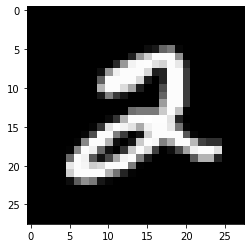

In [ ]:
### 이미지 데이터 확인
plt.imshow(X_train[5], cmap='gray')
plt.show()

#### 데이터 전처리
 - 답 원핫인코딩
 - 특성 이미지 데이터 정규화 (데이터 스케일 조정)

In [ ]:
# 다중분류 - > 원핫 인코딩 시켜서 각 클래스에 대한 오차를 계산할 수 있게 해야함
from tensorflow.keras.utils import to_categorical
y_train_oh = to_categorical(y_train)  
y_test_oh = to_categorical(y_test)
y_train_oh
# 1차원이였던 데이터가 원핫인코딩으로 인해 2차원으로 됨

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
X_train.shape[0] # X_train에는 6만장의 사진이 들어있다

60000

In [ ]:
X_test.shape[0] # X_test에는 1만장의 사진이 들어있다

10000

In [ ]:
# cnn은 다차원 데이터에 대한 표시가 필요함
# 흑백 : 1 , 컬러(rgb) : 3
X_train = X_train.reshape(60000, 28,28, 1) # 6만장의 사진이고 크기는 28,28 흑백(1)이다 
X_test = X_test.reshape(X_test.shape[0], 28,28, 1)
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test.shape

(10000, 28, 28, 1)

In [ ]:
X_train[0].shape

(28, 28, 1)

In [ ]:
# 데이터 범위 0~255 -> 0~1
# 분산을 감소시킬 수 있음 , 연산속도를 향상시킬 수 있음
# 255로 나눠줌
X_train = X_train / 255.0
X_test = X_test / 255.0 
X_train.shape

(60000, 28, 28, 1)

#### CNN 신경망 구성하기

In [ ]:
from tensorflow.keras import Sequential
# cnn 기능을 하는 함수
# Conv1D : 1차원 신호 데이터 , Conv2D : 2차원 이미지 데이터
# Conv3D : 3차원 영상 데이터
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.optimizers import Adam

In [ ]:
# cnn 신경망 모델 설계
cnn_model = Sequential()
# 1. 특성 추출부 (Conv2D, MaxPooling2D)
# Conv2D : 2차원 이미지 데이터에 대해 특징적인 부분을 도드라지게 만듬
# input_shape : (행,열,색상3 또는 흑백1)
# MaxPooling2D : 2차원 이미지 데이터에 대해 필요없는 부분을 삭제(이미지 크기 축소)
# 패딩 : 원본이미지와 크기를 동일하게 맞추기 위해 주변을 0으로 채움
cnn_model.add(Conv2D(input_shape = (X_train[0].shape),
                     # 특징 도드라지게 만드는(돋보기) 개수 -> 특징 추출 필터 개수를 설정
                     filters = 10,
                     # 필터(커널) 크기 설정
                     kernel_size = (3,3),
                     # 원본 데이터의 크기에 맞게 알아서 패딩 적용('valid':패딩x)
                     padding= 'same',
                     activation = 'relu',
                     # 필터로 합성곱 연산시 건너뛰는 크기 지정,(행,열) 지정
                     strides = (1,1)))
# pool_size : 디폴트값 2 -> 2X2필터에 strides도 2씩 적용
cnn_model.add(MaxPooling2D(pool_size = 2,
                           strides = 2))
cnn_model.add(Conv2D(filters = 20,
                     kernel_size = (4,4),
                     padding= 'same',
                     activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = 2))
# 2. 분류기 (Flatten, mlp)
# 다중분류 출력 : 유닛=클래스의개수, 활성화=softmax
# mlp 1차원 다룸 -> 펴주기 Flatten()
cnn_model.add(Flatten())
cnn_model.add(Dense(512, activation='relu'))
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(10, activation='softmax'))
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 10)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 20)        3220      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 20)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 980)               0         
                                                                 
 dense (Dense)               (None, 512)              

In [ ]:
cnn_model.compile(loss='categorical_crossentropy',
                  optimizer = Adam(learning_rate=0.0005),
                  metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
save_path = '/content/drive/MyDrive/Colab Notebooks/model/_{epoch:03d}_{val_accuracy:.4f}.hdf5' # d 는 정수를 뜻함

# 체크포인트 정의
m_mckp = ModelCheckpoint(filepath = save_path,
                         monitor = 'val_accuracy',
                         verbose = 1,
                         save_best_only=True
                         )

# 얼리스탑핑 정의
m_early = EarlyStopping(monitor = 'val_accuracy',
                        patience = 5)

In [ ]:
h = cnn_model.fit(X_train,y_train_oh,
                  validation_split = 0.2,
                  epochs = 100,
                  callbacks = [m_mckp, m_early])

Epoch 1/100
1487/1500 [============================>.] - ETA: 0s - loss: 0.0047 - accuracy: 0.9987
Epoch 1: val_accuracy improved from -inf to 0.98908, saving model to /content/drive/MyDrive/Colab Notebooks/model/_001_0.9891.hdf5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0047 - accuracy: 0.9986 - val_loss: 0.0599 - val_accuracy: 0.9891
Epoch 2/100
1498/1500 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 0.9994
Epoch 2: val_accuracy did not improve from 0.98908
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0024 - accuracy: 0.9994 - val_loss: 0.0754 - val_accuracy: 0.9883
Epoch 3/100
1500/1500 [==============================] - ETA: 0s - loss: 0.0054 - accuracy: 0.9987
Epoch 3: val_accuracy improved from 0.98908 to 0.99033, saving model to /content/drive/MyDrive/Colab Notebooks/model/_003_0.9903.hdf5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 0.0544 - val_accur

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
best_model = load_model('/content/drive/MyDrive/Colab Notebooks/model/_017_0.9918.hdf5')

In [ ]:
# 평가
best_model.evaluate(X_test,y_test_oh) # 오차값 / 신뢰도

313/313 [==============================] - 2s 4ms/step - loss: 0.0672 - accuracy: 0.9925


[0.06723175197839737, 0.9925000071525574]